# Logistic Regression on Kaggle's titanic dataset using sklearn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
import joblib
sns.set()
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/GitHub/titanic/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# dropping columns that have low or no impact on target: passenger id, name, ticket, carbin, embarked
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [ ]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [ ]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object

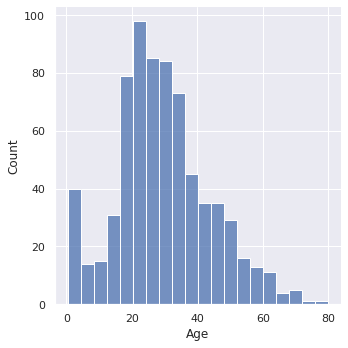

In [ ]:
# Only ages have missing values, check distribution plot
sns.displot(df['Age'])

In [ ]:
df['Age'].mean(), df['Age'].median()

(29.69911764705882, 28.0)

In [ ]:
# very close values between mean and median, replace missing values with mean
df['Age'].fillna(value=df['Age'].mean(), inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [ ]:
df.isnull().sum(0)

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [ ]:
# convert sex data string to digits
df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,0,22.0,1,0,7.2500
1,1,1,1,38.0,1,0,71.2833
2,1,3,1,26.0,0,0,7.9250
3,1,1,1,35.0,1,0,53.1000
4,0,3,0,35.0,0,0,8.0500


In [ ]:
df.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Fare        float64
dtype: object

In [ ]:
# for sibling, spouse, parent, and children, combine into one column "family"
df['family'] = df['SibSp'] + df['Parch']
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare,family
0,0,3,0,22.0,7.2500,1
1,1,1,1,38.0,71.2833,1
2,1,3,1,26.0,7.9250,0
3,1,1,1,35.0,53.1000,1
4,0,3,0,35.0,8.0500,0


In [ ]:
# write out data for future use
df.to_csv('/content/drive/MyDrive/GitHub/titanic/titanic-post.csv')

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,Fare,family
0,0,3,0,22.0,7.2500,1
1,1,1,1,38.0,71.2833,1
2,1,3,1,26.0,7.9250,0
3,1,1,1,35.0,53.1000,1
4,0,3,0,35.0,8.0500,0


In [ ]:
# splitting data into train/val/test sets
features = df.drop(['Survived'], axis=1)
target = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=10)
print(f'{len(X_train)}, {len(X_val)}, {len(X_test)}, {len(y_train)}, {len(y_val)}, {len(y_test)}')

534, 178, 179, 534, 178, 179


In [ ]:
# create model and perform grid search for regularization hyperpa
model = LogisticRegression()
hyper_params = {
    'C': [.001, .01, .1, 1., 10., 100., 1000.]
}
grid_search = GridSearchCV(model, hyper_params, cv=5)
grid_search.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]})

In [ ]:
# print grid search results
for C, mean, std in zip(grid_search.cv_results_['params'], 
                        grid_search.cv_results_['mean_test_score'], 
                        grid_search.cv_results_['std_test_score']):
  print(f'{C}, mean={round(mean,4)}, std={round(std,4)}')
print(f'best hyper-parameter= {grid_search.best_params_}')
model = grid_search.best_estimator_

{'C': 0.001}, mean=0.6592, std=0.0233
{'C': 0.01}, mean=0.6967, std=0.0118
{'C': 0.1}, mean=0.7922, std=0.0339
{'C': 1.0}, mean=0.7996, std=0.0246
{'C': 10.0}, mean=0.7996, std=0.0246
{'C': 100.0}, mean=0.7996, std=0.0246
{'C': 1000.0}, mean=0.7996, std=0.0246
best hyper-parameter= {'C': 1.0}


In [ ]:
# save model
joblib.dump(grid_search.best_estimator_, './titanic_logistic_regression.pkl')

['./titanic_logistic_regression.pkl']

In [ ]:
# results on training set
predict = model.predict(X_train)
accuracy = round(accuracy_score(y_train, predict), 4)
precision = round(precision_score(y_train, predict), 4)
recall = round(recall_score(y_train, predict), 4)
print(f'accuracy={accuracy}, precision={precision}, recall={recall}')

accuracy=0.7959, precision=0.7665, recall=0.7056


In [ ]:
# results on validation set
predict = model.predict(X_val)
accuracy = round(accuracy_score(y_val, predict), 4)
precision = round(precision_score(y_val, predict), 4)
recall = round(recall_score(y_val, predict), 4)
print(f'accuracy={accuracy}, precision={precision}, recall={recall}')

accuracy=0.7921, precision=0.7544, recall=0.6515


In [ ]:
# results on test set if the model is picked
predict = model.predict(X_test)
accuracy = round(accuracy_score(y_test, predict), 4)
precision = round(precision_score(y_test, predict), 4)
recall = round(recall_score(y_test, predict), 4)
print(f'accuracy={accuracy}, precision={precision}, recall={recall}')

accuracy=0.8324, precision=0.7857, recall=0.7097
